# **Fish Analysis** 🐟🐠
`context`: Dataset recording various measurements of 7 different species of fish at a fish market. Predictive models can be used to predict weight, species, etc.

| **Attribute** | **Description** |  
|-------------|----------------|  
| **Species** | Species name of the fish |  
| **Weight**   | Weight of the fish in grams |  
| **Length1** (Standard Length) | Vertical length in cm |  
| **Length2** (Forked Length) | Diagonal length in cm |  
| **Length3** (Total Length) | Cross length in cm |  
| **Height**   | Height in cm from dorsal to the bottom thin |  
| **Width**    | Width in cm, thickness of the body |  

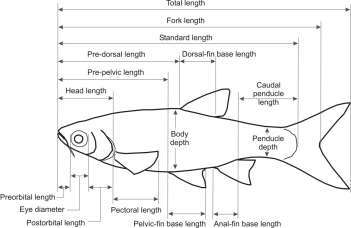

In [90]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [91]:
df = pd.read_csv('dataset/Fish.csv')

In [92]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [93]:
df.shape 

(159, 7)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [95]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [96]:
df.describe(include='object').T 

,count,unique,top,freq
Species,159,7,Perch,56


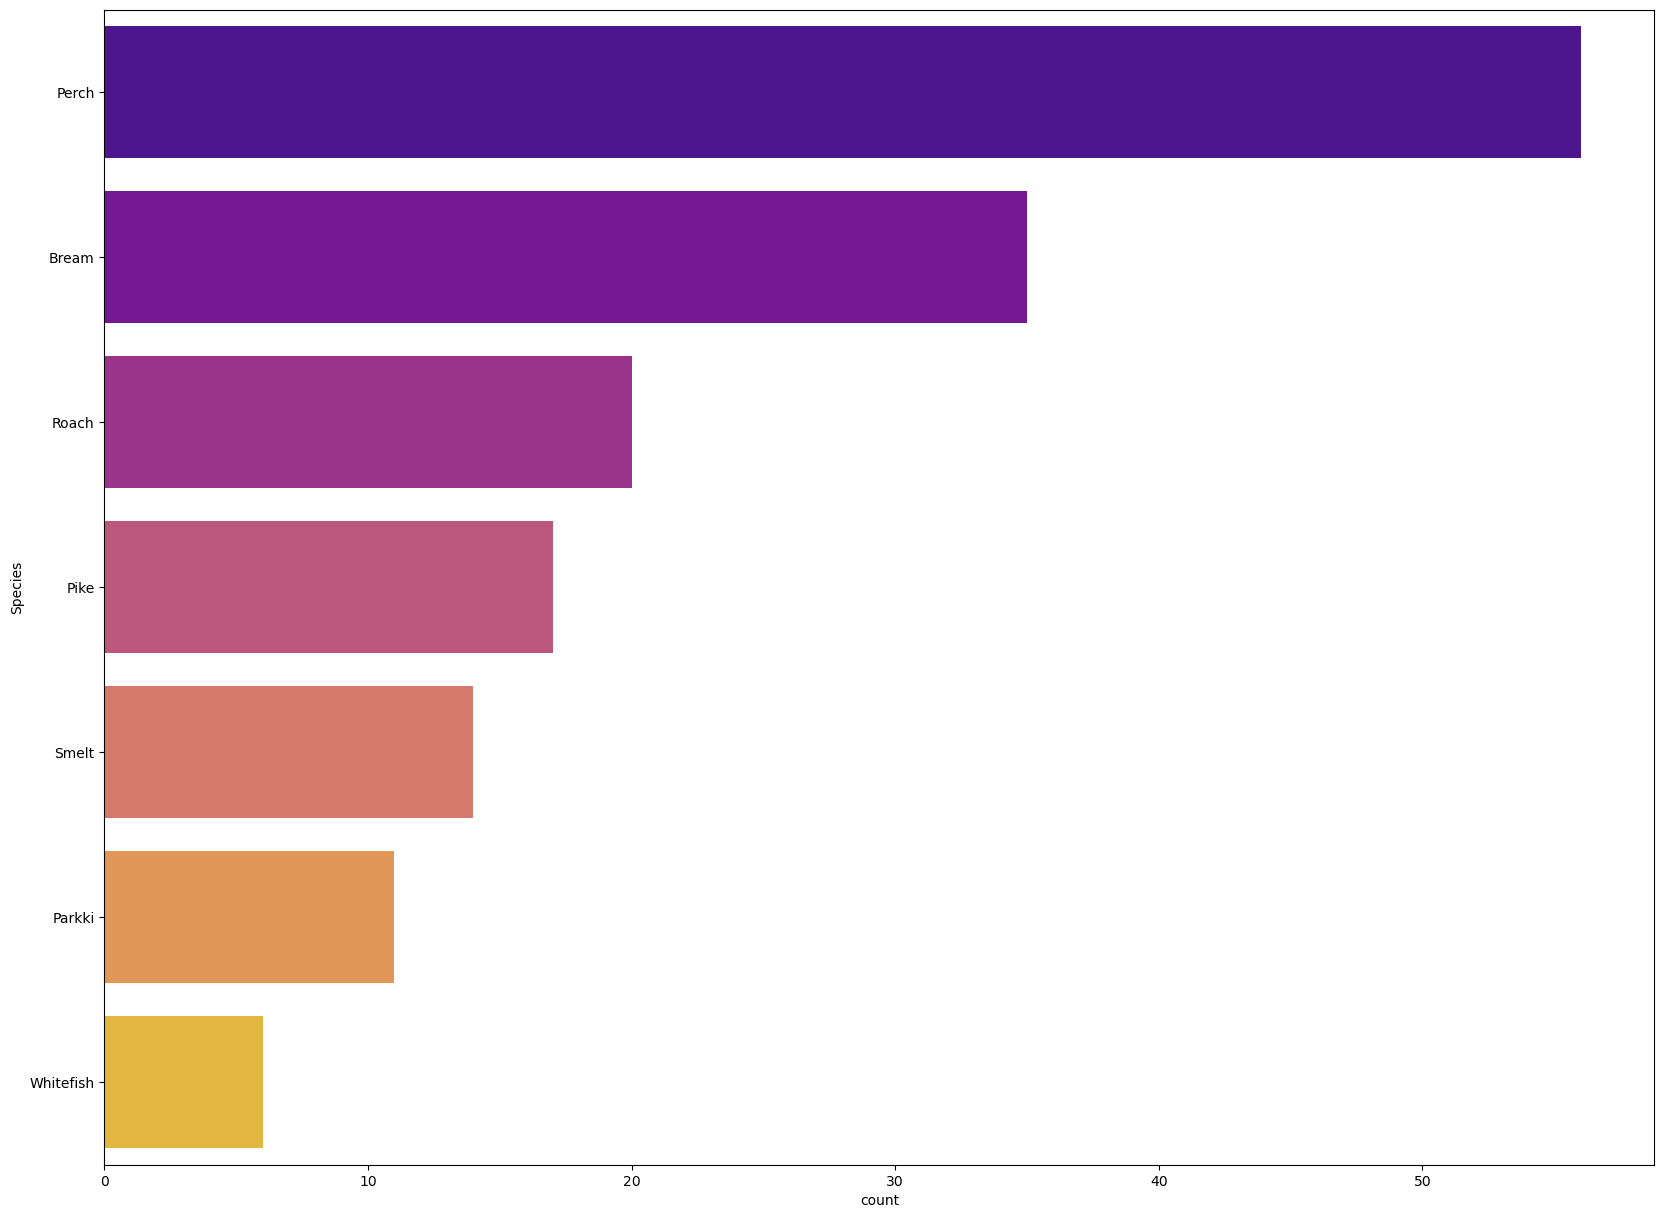

In [97]:
species = df['Species'].value_counts().reset_index()
sns.barplot(x=species['count'], y=species['Species'], hue=species['Species'], palette='plasma')
plt.show()

In [98]:
plt.rcParams['figure.figsize'] = (20, 15)


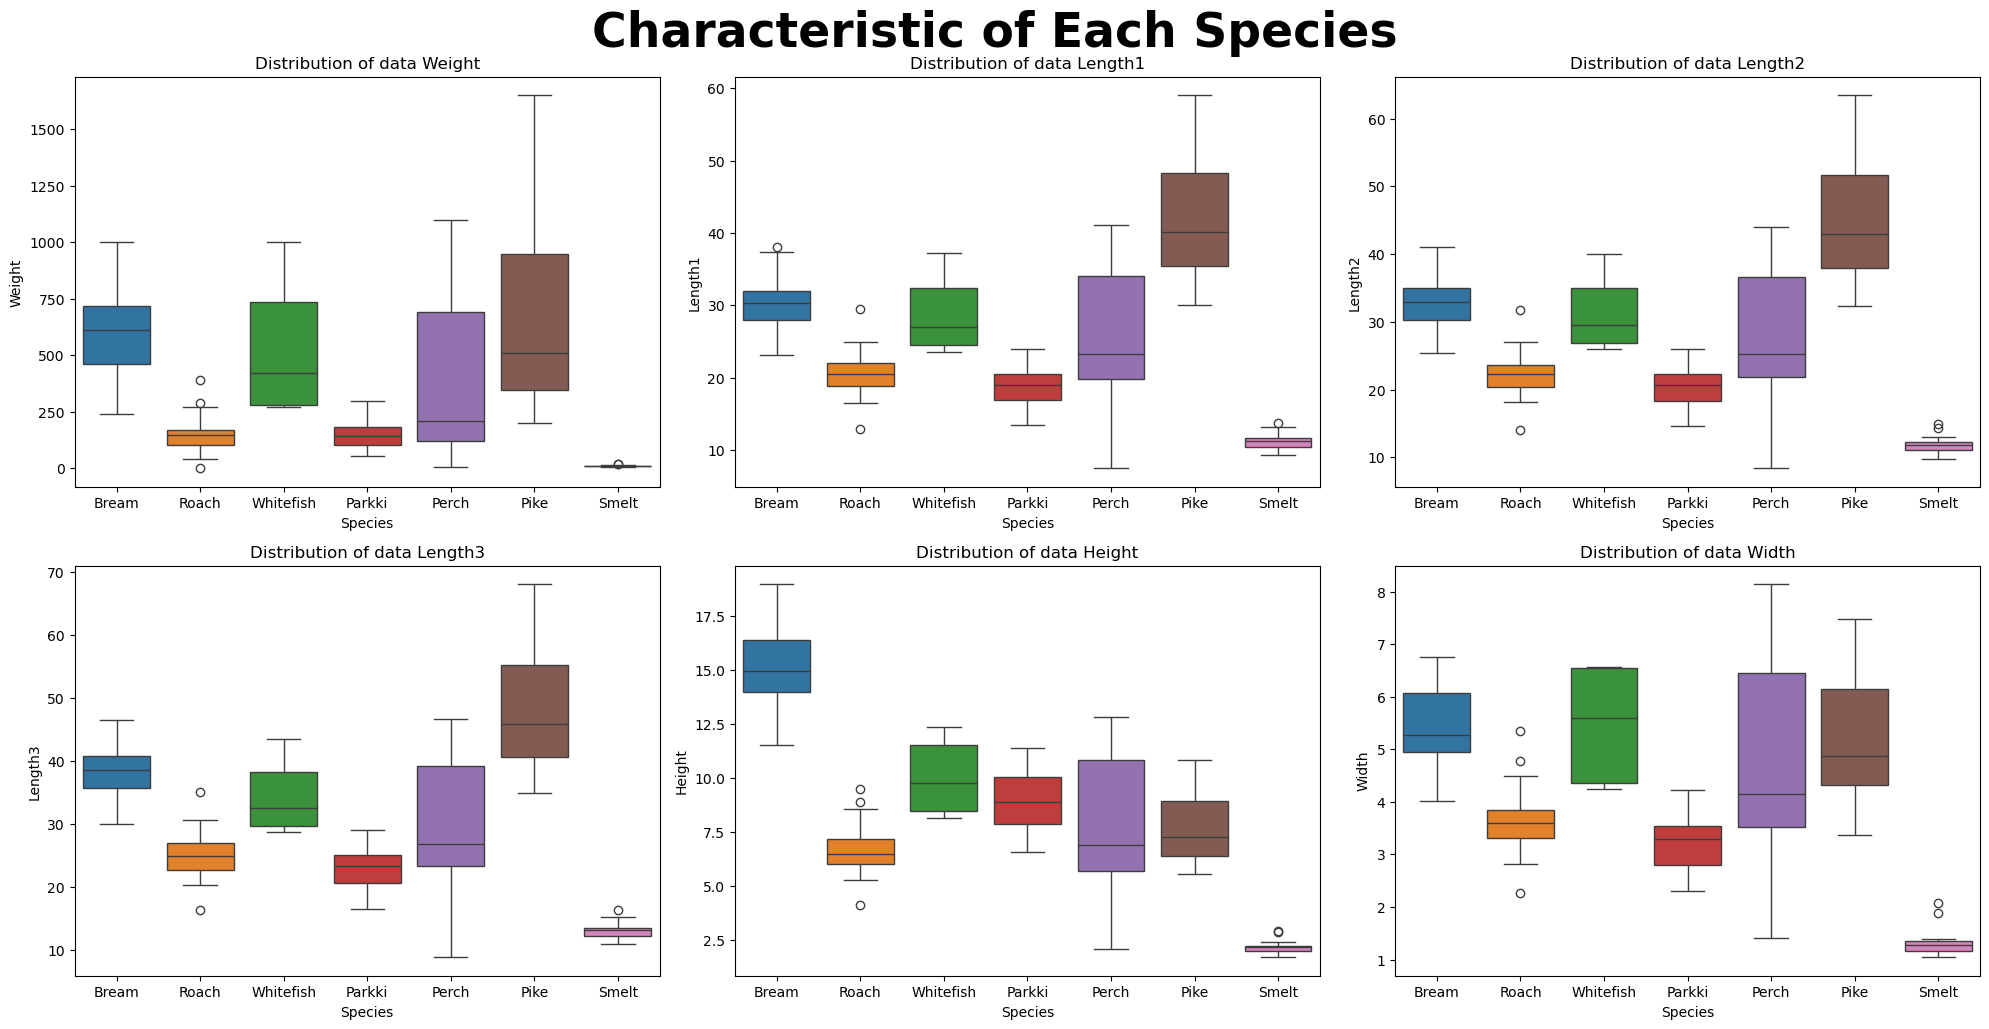

In [99]:
for i, col in enumerate(df.select_dtypes(include='number')):
    plt.subplot(3, 3, i+1)
    plt.title(f'Distribution of data {col}')
    sns.boxplot(data=df, x='Species', y=col, hue='Species')
    
plt.suptitle(f'Characteristic of Each Species', size=34, weight='bold')
plt.tight_layout()
plt.show()

<div style="background-color:red; padding:30px; text-align:center; font-family:'Poppins'; font-size:30px; border-radius:10px ">1 | Exploratory Data Analysis </div>

<div style="background-color:white; padding:20px; color:red; font-family:'Poppins'; font-size:20px; border-radius:10px ">
    Load Data
</div>

<div style="background-color:white; padding:20px; color:red; font-family:'Poppins'; font-size:20px; border-radius:10px ">
    Load Data
</div>

In [100]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import deque, Counter
from matplotlib.patches import Patch, ConnectionPatch
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, sample=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right 
        self.info_gain = info_gain 
        self.value = value 
        self.sample = sample 

In [102]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_samples_split=10, min_samples_leaf=3, features=None, mode='entropy'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.features = features
        self.mode = mode 
        self.feature_importance = None 
        
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape 
        
        if self.features is not None:
            features = self.features
        else:
            features = np.arange(n_features)
            
        if n_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, n_samples, features)
            
            if best_split['info_gain']>0 and len(best_split['dataset_left'])>=self.min_samples_leaf and len(best_split['dataset_right'])>=self.min_samples_leaf:
                feature_index = best_split['feature_index']
                
                self.feature_importance[0][feature_index] += best_split['info_gain']
                self.feature_importance[1][feature_index] += 1
                
                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth+1)
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth+1)
                return Node(
                    feature_index = feature_index,
                    threshold = best_split['threshold'],
                    left = left_subtree,
                    right = right_subtree,
                    info_gain = best_split['info_gain'],
                    sample = Y,
                )
                
        leaf_value = self.calc_leaf_value(Y)
        return Node(value=leaf_value, sample=Y)
    
    
    def get_best_split(self, dataset, n_samples, features):
        best_split = {}
        max_info_gain = -float('inf')
        
        for feature_index in features:
            possible_thresholds = np.unique(dataset[:, feature_index])
            
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    
                    curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)
                    
                    if curr_info_gain > max_info_gain:
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'dataset_left': dataset_left,
                            'dataset_right': dataset_right,
                            'info_gain': curr_info_gain,
                        }
                        max_info_gain = curr_info_gain
        return best_split
    
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def calc_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def information_gain(self, parent, l_child, r_child, mode):
        weigth_l = len(l_child) / len(parent)
        weigth_r = len(r_child) / len(parent)
        if mode == 'gini':
            gain = self.gini(parent) - (weigth_l*self.gini(l_child) + weigth_r*self.gini(r_child))
        else:
            gain = self.entropy(parent) - (weigth_l*self.entropy(l_child) + weigth_r*self.entropy(r_child))
        return gain
        
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini
    
    
    """POST PRUNING"""
    def cost_complexity_pruning(self, alpha=0.01, tree=None):
        if tree is None:
            tree = self.root
            
        if tree.left and tree.right:
            self.cost_complexity_pruning(alpha, tree.left)
            self.cost_complexity_pruning(alpha, tree.right)
            
            left_cost = self._calc_subtree_cost(tree.left)
            right_cost = self._calc_subtree_cost(tree.right)
            
            if (left_cost + right_cost - 1) * alpha >= tree.info_gain:
                tree.value = self.calc_leaf_value([leaf.value for leaf in self._get_leaves(tree)]) 
                tree.left = None
                tree.right = None 
        return tree
    
    def _get_leaves(self, tree):
        if tree is not None:
            return [tree]
        return self._get_leaves(tree.left) + self._get_leaves(tree.right)
    
    def _calc_subtree_cost(self, tree):
        if tree is not None:
            return 0
        
        if tree.value is not None:
            y = np.array(tree.sample)
            if self.mode == 'gini':
                self.gini(y)
            else:
                self.entropy(y)
                
        left_cost = self._calc_subtree_cost(tree.left)
        right_cost = self._calc_subtree_cost(tree.right)
        return left_cost + right_cost + 1
    
    def reduced_error_pruning(self, X_test, y_test, node):
        if node.left and node.right:
            self.reduced_error_pruning(X_test, y_test, node.left)
            self.reduced_error_pruning(X_test, y_test, node.right)
            
            if node.left.value is not None and node.right.value is not None:
                accuracy_before = np.mean(self.predict(X_test) == y_test)
                
                node.value = self.calc_leaf_value(y_test)
                accuracy_pruned = np.mean(self.predict(X_test) == y_test)
                
                if accuracy_pruned >= accuracy_before:
                    node.left = None 
                    node.right = None 
                else:
                    node.value = None 
                    
        
    """FITTING AND PREDICTING"""
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.feature_importance = np.zeros([2, X.shape[1]])
        self.root = self.build_tree(dataset)
        
    def predict(self, X):
        predictions = [self.make_predictions(x, self.root) for x in X]
        return predictions
    
    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
        
    def get_leaf_info(self, x, tree=None, node_id=0):
        if tree is None:
            tree = self.root

        if tree.value is not None:  # If it's a leaf node
            class_counts = np.bincount(tree.sample.astype(int), minlength=2)
            probabilities = class_counts / sum(class_counts)  # Normalize to get probabilities
            return node_id, probabilities

        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.get_leaf_info(x, tree.left, node_id * 2 + 1)
        else:
            return self.get_leaf_info(x, tree.right, node_id * 2 + 2)
        
    def get_all_leaf_info(self, tree=None, node_id=0, leaf_info=None):
        if leaf_info is None:
            leaf_info = {}

        if tree is None:
            tree = self.root

        if tree.value is not None:  # If it's a leaf node
            probabilities = Counter(tree.sample) # Normalize to get probabilities
            leaf_info[node_id] = probabilities
            return leaf_info

        # Recursively traverse left and right child nodes
        self.get_all_leaf_info(tree.left, node_id * 2 + 1, leaf_info)
        self.get_all_leaf_info(tree.right, node_id * 2 + 2, leaf_info)

        return leaf_info 
    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
            
    def assign_node_ids(self, node=None, id=0):
        if node is None:
            node = self.root
        
        node.id = id
        if hasattr(node, 'left') and node.left:
            self.assign_node_ids(node.left, 2 * id + 1)
        if hasattr(node, 'right') and node.right:
            self.assign_node_ids(node.right, 2 * id + 2)
    

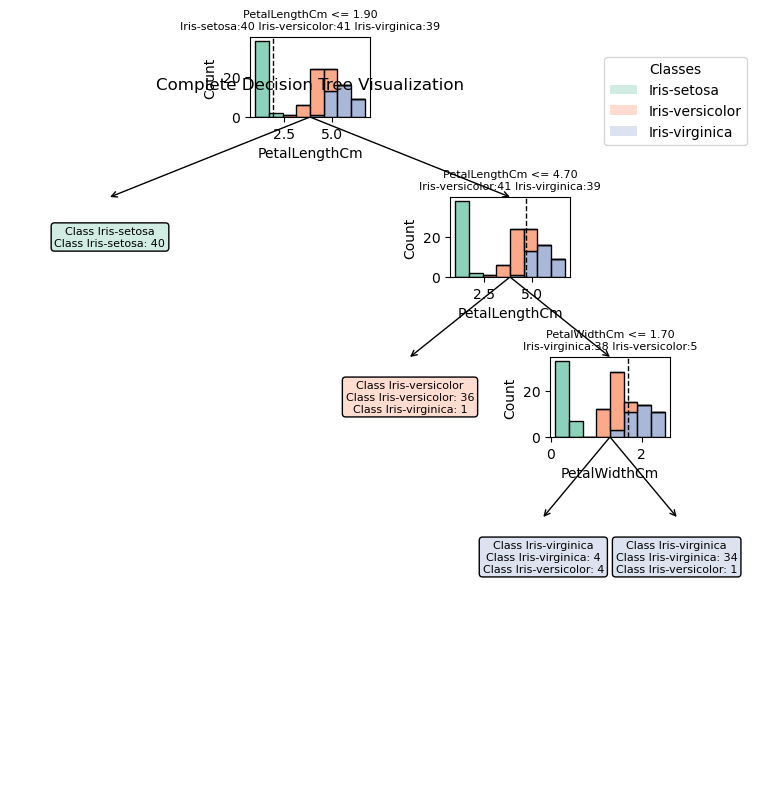

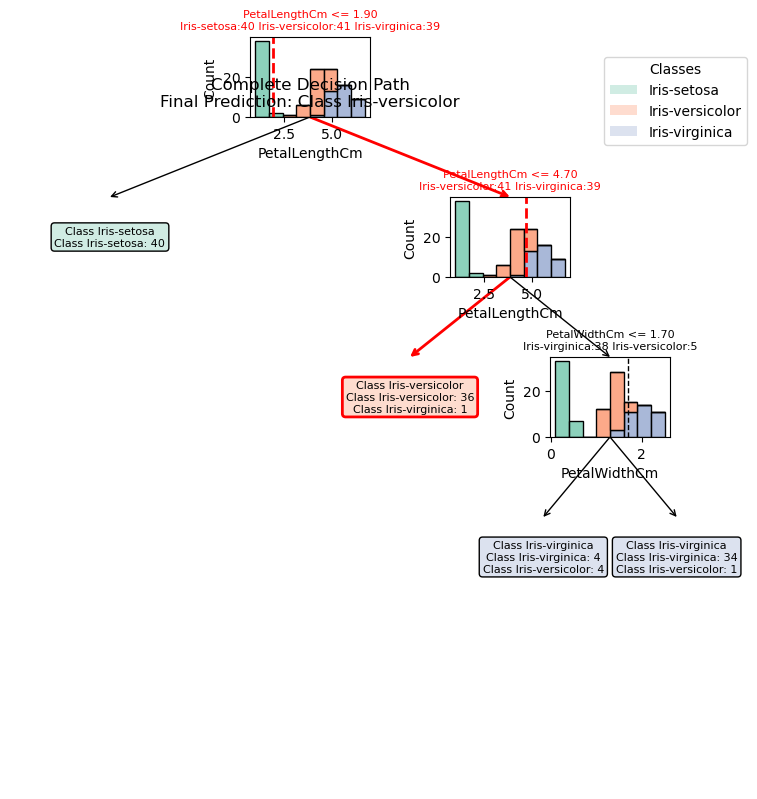

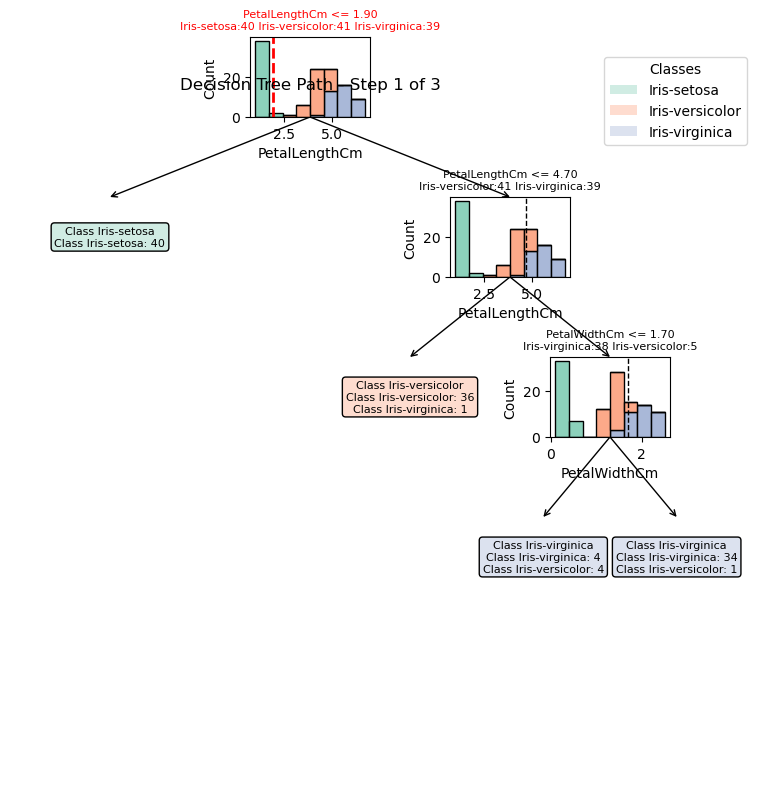

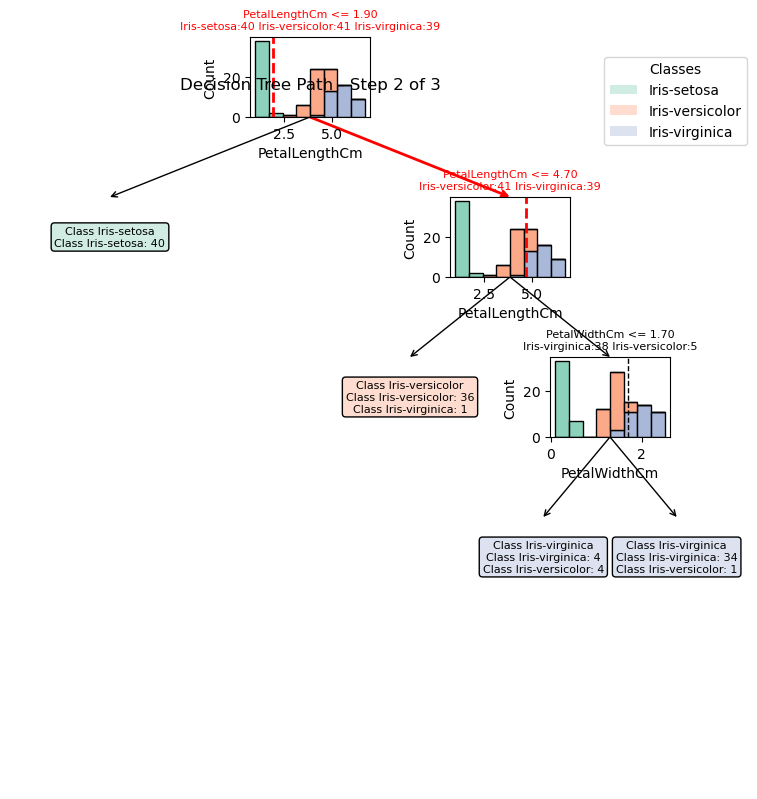

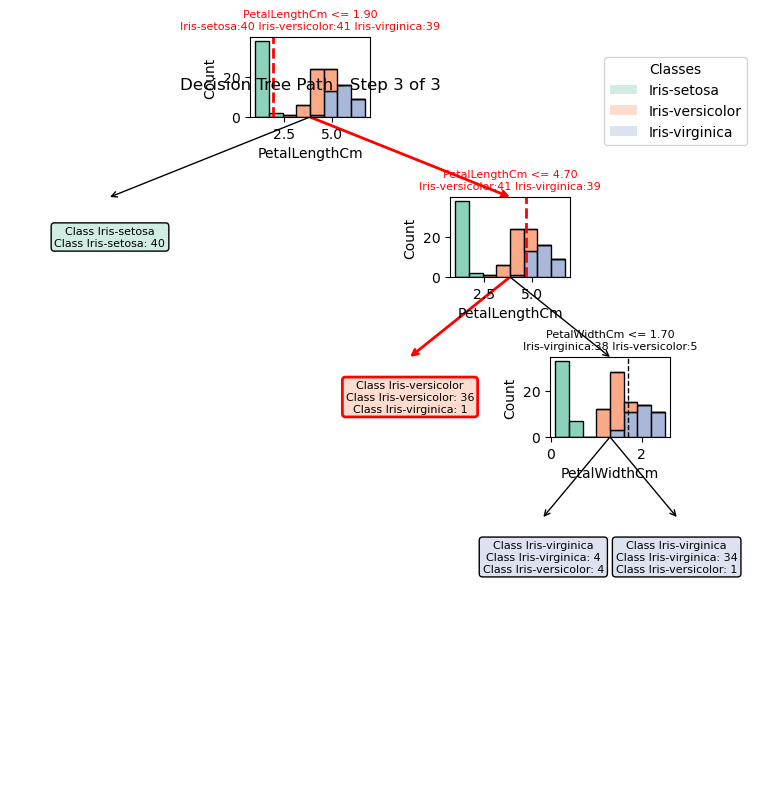

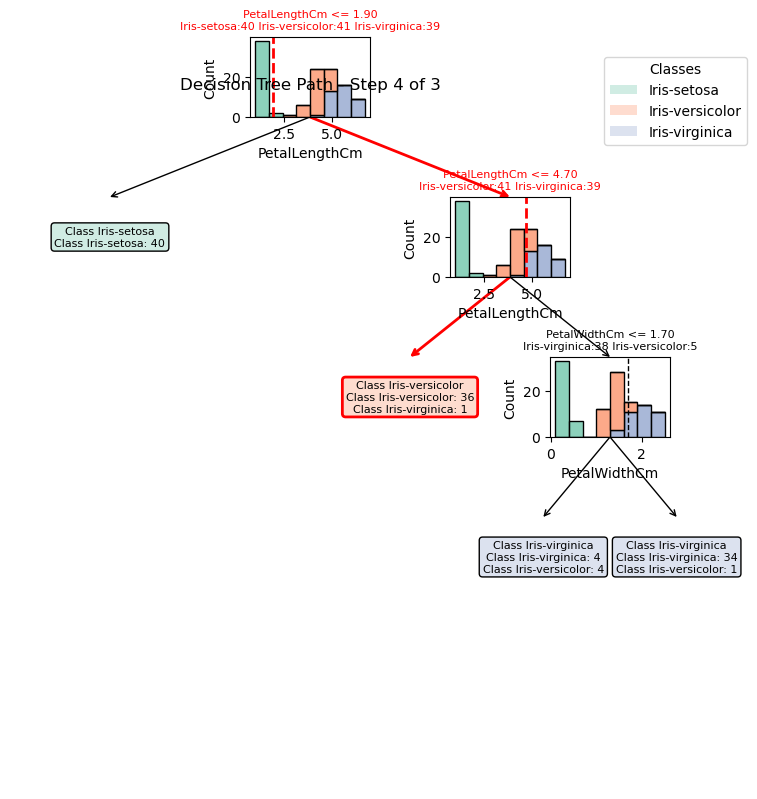

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
from matplotlib.patches import ConnectionPatch, Patch
from sklearn.model_selection import train_test_split

class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.palette = self._create_color_palette()
        self.node_cache = {}
        self._cache_nodes(tree.root)
        
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))
    
    def _cache_nodes(self, root):
        """Pre-cache all nodes for faster lookup"""
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if hasattr(node, 'left') and node.left:
                queue.extend([node.left, node.right])

    def get_prediction_path(self, x):
        """Helper method to get prediction path and decisions"""
        path = []
        decisions = []
        node = self.tree.root
        
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            if feature_val <= node.threshold:
                decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {feature_val:.2f} ≤ {node.threshold:.2f}")
                node = node.left
            else:
                decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {feature_val:.2f} > {node.threshold:.2f}")
                node = node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions

    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        if fig is None:
            fig = plt.figure(figsize=(8, 8))
        if ax is None:
            ax = fig.add_subplot(111)
        
        ax.clear()
        ax.set_axis_off()

        node_width = 0.15
        node_height = 0.1
        level_height = 0.2
        node_boxes = {}
        path_ids = []
        decisions = []

        def get_node_positions(node, level=0, x=0.5):
            positions = {id(node): (x, 1 - level * level_height)}
            if hasattr(node, 'left') and node.left:
                spacing = 0.25 / (level + 1)
                positions.update(get_node_positions(node.left, level + 1, x - spacing))
                positions.update(get_node_positions(node.right, level + 1, x + spacing))
            return positions

        node_positions = get_node_positions(self.tree.root)

        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = [id(node) for node in prediction_path]

        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, is_active=(node_id in path_ids))
            else:
                self._draw_decision_node(node_ax, node, is_active=(node_id in path_ids))

        self._draw_connections(node_positions, node_boxes, path_ids, ax)

        # Add legend
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements,
                 loc='upper right',
                 bbox_to_anchor=(1.2, 1.2),
                 title="Classes")

        if x is not None:
            if step is not None:
                title = f"Decision Tree Path - Step {step} of {len(decisions)}"
            else:
                prediction = self.tree.predict([x])[0]
                title = f"Complete Decision Path\nFinal Prediction: Class {prediction}"
        else:
            title = "Complete Decision Tree Visualization"
        
        fig.suptitle(title, fontsize=12, y=1)
        return fig, ax

    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        edge_color = 'red' if is_active else 'black'
        line_width = 2 if is_active else 1
        
        from collections import Counter
        distribution = Counter(node.sample)
        dist_str = "\n".join([f"Class {k}: {v}" for k, v in distribution.items()])
        txt = f"Class {node.value}\n{dist_str}"
        
        majority_class = max(distribution.items(), key=lambda x: x[1])[0]
        bg_color = self.palette[majority_class]
        
        ax.text(0.5, 0.5, txt,
               ha='center', va='center',
               bbox=dict(boxstyle="round", 
                        fc=(*bg_color, 0.3),
                        ec=edge_color, 
                        linewidth=line_width),
               fontsize=8)

    def _draw_decision_node(self, ax, node, is_active):
        edge_color = 'red' if is_active else 'black'
        line_width = 2 if is_active else 1
        
        feature_data = self.data_df[self.feature_names[node.feature_index]]
        
        sns.histplot(
            data=self.data_df,
            x=self.feature_names[node.feature_index],
            hue=self.target_col,
            palette=self.palette,
            multiple="stack",
            ax=ax
        )
        
        ax.axvline(node.threshold, color=edge_color, 
                  linestyle='--', linewidth=line_width)
        
        ax.get_legend().remove()
        
        from collections import Counter
        distribution = Counter(node.sample)
        dist_str = " ".join([f"{k}:{v}" for k, v in distribution.items()])
        title = f"{self.feature_names[node.feature_index]} <= {node.threshold:.2f}\n{dist_str}"
        ax.set_title(title, fontsize=8, color=edge_color)

    def _draw_connections(self, node_positions, node_boxes, path_ids, main_ax):
        for node_id in node_positions:
            node = self.node_cache[node_id]
            if hasattr(node, 'left') and node.left:
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, node_boxes, is_active, main_ax)

    def _draw_connection(self, parent, child, node_boxes, is_active, main_ax):
        color = 'red' if is_active else 'black'
        width = 2 if is_active else 1
        
        parent_box = node_boxes[id(parent)]
        child_box = node_boxes[id(child)]
        
        con = ConnectionPatch(
            xyA=(parent_box[0] + parent_box[2]/2, parent_box[1]),
            xyB=(child_box[0] + child_box[2]/2, child_box[1] + child_box[3]),
            coordsA="figure fraction", coordsB="figure fraction",
            axesA=main_ax, axesB=main_ax,
            arrowstyle="->", color=color, linewidth=width
        )
        main_ax.add_artist(con)

if __name__ == "__main__":
     # Load and prepare data
    df = pd.read_csv('dataset/Iris.csv')
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', ]
    target_col = 'Species'

    # Split the data
    X = df[feature_names].values
    Y = df[target_col].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Create and train the tree
    tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, max_depth=1000)
    tree.fit(X_train, y_train)
    
    # Prepare data for visualization
    data_df = pd.DataFrame(X_train, columns=feature_names)
    data_df[target_col] = y_train.flatten()
    
    # Create visualization object
    viz = TreeVisualization(tree, data_df, target_col, feature_names)
    
    # Visualize complete tree
    fig, ax = viz.plot_prediction_path()
    plt.show()
    
    # Visualize prediction path for a specific sample
    sample_to_predict = X_test[0]
    fig, ax = viz.plot_prediction_path(sample_to_predict)
    plt.show()
    
    # Show step-by-step prediction
    for step in range(1, 5):
        fig, ax = viz.plot_prediction_path(sample_to_predict, step=step)
        plt.show()

In [114]:
columns = {
    'test_ratio',
    'predict',
    'accuracy',
    'feature1', 
    'feature2', 
    'feature3', 
    'values1',
    'values2',
    'values3',
    'scenario', 
    'min_sample_split',
    'max_depth',
    'pruning',
}

In [ ]:
import tkinter as tk 
from tkinter import messagebox, ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class FishClassifierApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscreen', True)
        self.root.title("Fish Classifier App")
        # self.history = self.load_history_from_pickle()
        
        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control, padding="20")
        self.history_tab = ttk.Frame(self.tab_control, padding="20")
        self.setting_tab = ttk.Frame(self.tab_control, padding="20")
        
        ttk.Style().configure('TNotebook.Tab', padding=[40, 10], font=('Poppins medium', 20))
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Setting")
        self.tab_control.pack(fill='x', anchor='n')
        
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
    
    def init_predict_tab(self):
        ttk.Label(self.predict_tab, text="Fish Species Prediction App " , font=('Poppins Medium', 25)).grid( column=0, row=0, sticky='w')
        ttk.Label(self.predict_tab,text="Get Species of Fish Predict with Decision Tree Algorithm", font=('Poppins', 15)).grid( column=0, row=1, sticky='w')
    
    def init_history_tab(self):
        ttk.Label(self.history_tab, text="History" , font=('Poppins Medium', 25)).grid( column=0, row=0, sticky='w')
        ttk.Label(self.history_tab, text="Check your history and compare the performance", font=('Poppins', 15)).grid( column=0, row=1, sticky='w')
        
        self.history_tree = ttk.Treeview(self.history_tab)
        self.history_tree.heading
    def init_setting_tab(self):
        ttk.Label(self.setting_tab, text="Get your best Prediction" , font=('Poppins Medium', 25)).grid( column=0, row=0, sticky='w')
        ttk.Label(self.setting_tab, text="Adjust type of model and make your best result", font=('Poppins', 15)).grid( column=0, row=1, sticky='w')
        
        
if __name__ == "__main__":
    root = tk.Tk()
    app = FishClassifierApp(root)
    root.mainloop()
    

: 